# Python 解决线性规划问题案例

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.rcParams["font.sans-serif"] = ["FangSong"]
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")

In [4]:
import numpy as np
import pulp as pp 
from scipy.optimize import linprog, minimize, linear_sum_assignment

**案例**：
$$
\max z = 8 x_1 - 2 x_2 + 3 x_3 - x_4 - 2 x_5 \\ 
\begin{cases}
x_1 + x_2 + x_3 + x_4 + x_5 \le 400 \\
x_1 + 2 x_2 + 2 x_3 + x_4 + 6 x_5 \le 800 \\
2 x_1 + x_2 + 6 x_3 \le 200 \\
x_3 + x_4 + 5 x_5 \le 200 \\
0 \le x_i \le 99,\ i = 1,\ 2,\ 3,\ 4 \\
x_5 \ge -10
\end{cases}

In [ ]:
c = [8, -2, 3, -1, -2]
A_ub = [[1, 1, 1, 1, 1], [1, 2, 2, 1, 6], [2, 1, 6, 0, 0], [0, 0, 1, 1, 5]]
b_ub = [400, 800, 200, 200]
# 定义变量
x = [pp.LpVariable(f"x{i}", lowBound=0, upBound=99) for i in range(1, 5)]
x.append(pp.LpVariable("x5", lowBound=-10))
# 定义问题
prob = pp.LpProblem("max_z", sense=pp.LpMaximize)
# 点乘
prob += pp.lpDot(c, x)
for i in range(len(A_ub)):
    prob += pp.lpDot(x, A_ub[i]) <= b_ub[i]
prob.solve()

print(f"优化结果：{pp.value(prob.objective)}")
print(f"参数取值：{[pp.value(var) for var in x]}")

In [ ]:
c = np.array([-8, 2, 3, 1, 2])
A_ub = np.array([[1, 1, 1, 1, 1], [1, 2, 2, 1, 6], [2, 1, 6, 0, 0], [0, 0, 1, 1, 5]])
b_ub = np.array([[400], [800], [200], [200]])
bounds = np.array([(0, 99), (0, 99), (0, 99), (0, 99), (-10, None)])
res = linprog(c=c, A_ub=A_ub, b_ub=b_ub, A_eq=None, b_eq=None, bounds=bounds)
print(f"优化结果：{-res.fun}")
print(f"参数取值：{list(res.x)}")

In [ ]:
c = np.array([-3 * 24, -4 * 16])
A_ub = np.array([[1, 1], [12, 8], [3, 0]])
b_ub = np.array([50, 800, 100])
bounds = np.array([(0, None), (0, None)])
res = linprog(c=c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)
res

In [ ]:
c = [110, 120, 130, 110, 115, -150]
A_ub = [
    (1, 1, 0, 0, 0, 0),
    (0, 0, 1, 1, 1, 0),
    (8.8, 6.1, 2.0, 4.2, 5.0, -6),
    (-8.8, -6.1, -2.0, -4.2, -5.0, 3),
]
b_ub = [200, 250, 0, 0]
A_eq = [(1, 1, 1, 1, 1, -1)]
b_eq = [(0,)]
bounds = 6 * [(0, None)]
res = linprog(c=c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
res

In [ ]:
# 目标函数的系数
c = [2, 3, 1]
A_ub = [(1, 4, 2), (3, 2, 0)]
b_ub = [8, 6]
A_eq = [(1, 2, 4)]
b_eq = [101]

# 确定最大最小化问题，当前确定的是最大化问题
m = pp.LpProblem(sense=pp.LpMaximize)

# 定义三个变量放在列表中
x = [pp.LpVariable(f"x{i}", lowBound=0) for i in [1, 2, 3]]

# 定义目标函数，并将目标函数加入求解的问题中
m += pp.lpDot(c, x)  # lpDot 用于计算点积

# 设置比较条件
for i in range(len(A_eq)):
    m += pp.lpDot(A_eq[i], x) == b_eq[i]

# 求解
m.solve()
# 输出结果
print(f"优化结果：{pp.value(m.objective)}")
print(f"参数取值：{[pp.value(var) for var in x]}")

In [ ]:
x1 = pp.LpVariable("x1", 0, None, pp.LpInteger)
x2 = pp.LpVariable("x2", 0, None, pp.LpInteger)
x3 = pp.LpVariable("x3", 0, None, pp.LpInteger)
prob = pp.LpProblem("max_z", sense=pp.LpMaximize)
prob += 2 * x1 + 3 * x2 - 5 * x3
prob += x1 + x2 + x3 == 7
prob += x1 + 3 * x2 + x3 <= 12
prob += 2 * x1 - 5 * x2 + x3 >= 10

status = prob.solve()
print(f"优化结果：{pp.value(prob.objective)}")
print(f"参数取值：{[pp.value(var) for var in (x1, x2, x3)]}")

In [ ]:
x = [pp.LpVariable(f"x{i}", lowBound=0) for i in range(1, 7)]
prob = pp.LpProblem("max_z", sense=pp.LpMaximize)
c = np.array([-110, -120, -130, -110, -115, 150])
A_ub = np.array(
    [
        [1, 1, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0],
        [8.8, 6.1, 2.0, 4.2, 5.0, -6.0],
        [-8.8, -6.1, -2.0, -4.2, -5.0, 3.0],
    ]
)
b_ub = np.array([200, 250, 0, 0])
A_eq = np.array([1, 1, 1, 1, 1, -1])
prob += pp.lpDot(c, x)
for i in range(4):
    prob += pp.lpDot(x, A_ub[i]) <= b_ub[i]
prob += pp.lpDot(A_eq, x) == 0

prob.solve()
print(f"优化参数：{pp.value(prob.objective)}")
print(f"参数取值：{[pp.value(var) for var in x]}")

In [ ]:
c = [110, 120, 130, 110, 115, -150]
A_ub = [
    (1, 1, 0, 0, 0, 0),
    (0, 0, 1, 1, 1, 0),
    (8.8, 6.1, 2.0, 4.2, 5.0, -6),
    (-8.8, -6.1, -2.0, -4.2, -5.0, 3),
]
b_ub = [200, 250, 0, 0]
A_eq = [(1, 1, 1, 1, 1, -1)]
b_eq = [(0,)]
bounds = 6 * [(0, None)]
res = linprog(c=c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
print(f"优化结果：{-res.fun}")
print(f"参数取值：{list(res.x)}")

$$ 
\max f = x_1 x_2 x_3 \\ 
s.t. 
\begin{cases}
-x_1 + 2 x_2 + 2 x_3 \ge 0 \\
x_1 + 2 x_2 + 2 x_3 \le 72 \\
10 \le x_2 \le 20 \\
x_1 - x_2 = 10
\end{cases}

In [7]:
N = 10000000
x2 = np.random.uniform(10, 20.1, N)
x1 = x2 + 10
x3 = np.random.uniform(-5, 16, N)
f = float("-inf")
for i in range(N):
    if -x1[i] + 2 * x2[i] + 2 * x3[i] >= 0 and x1[i] + 2 * x2[i] + 2 * x3[i] <= 72:
        result = x1[i] * x2[i] * x3[i]
        if result > f:
            f = result
            final_X = [x1[i], x2[i], x3[i]]

print(f"优化结果：{result}")
print(f"参数取值：{final_X}")

优化结果：1011.988331807773
参数取值：[22.59596731329431, 12.59596731329431, 12.106037980196525]


In [7]:
from scipy.optimize import brent, fmin, minimize

In [10]:
# 1. Demo1: 单变量无约束优化问题
def func(x):  # 目标函数
    f = x**2 - 8 * np.sin(2 * x + np.pi)
    return f


x_ini = -5.0
x_opt = brent(func, brack=(x_ini, 2))
print(f"x_ini = {x_ini: .4f}\tf(x_ini) = {func(x_ini): .4f}")
print(f"x_opt = {x_opt: .4f}\tf(x_opt) = {func(x_opt): .4f}")

x_ini = -5.0000	f(x_ini) =  29.3522
x_opt = -0.7391	f(x_opt) = -7.4195


In [14]:
# 2. Demo2: 多变量无约束优化问题
def func(x):
    f = 100.0 * (x[0] - x[1] ** 2.0) ** 2.0 + (1.0 - x[1]) ** 2.0
    return f


x_ini = np.array([-2, 2])
x_opt = fmin(func, x_ini)
print(f"x_ini = {x_ini}\tf(x_ini) = {func(x_ini): .4f}")
print(f"x_opt = {x_opt}\tf(x_opt) = {func(x_opt): .4f}")

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 88
         Function evaluations: 164
x_ini = [-2  2]	f(x_ini) =  3601.0000
x_opt = [1.00000048 1.00000196]	f(x_opt) =  0.0000


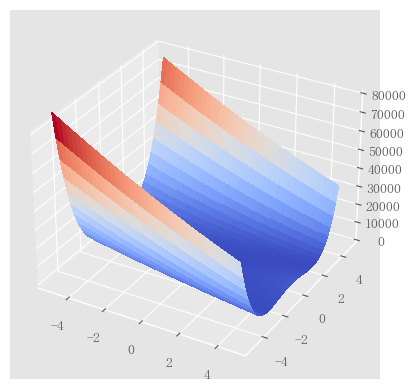

In [6]:
def func(x):
    f = 100.0 * (x[0] - x[1] ** 2.0) ** 2.0 + (1.0 - x[1]) ** 2.0
    return f


x1 = np.arange(-5, 5, 0.25)
y1 = np.arange(-5, 5, 0.25)
x1, y1 = np.meshgrid(x1, y1)
z1 = np.zeros(x1.shape)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        z1[i, j] = func([x1[i, j], y1[i, j]])
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x1, y1, z1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(0, 80000)
plt.show()

$$
\min z = 60 - 10 x_1 - 4 x_2 + x_1 ^2 + x_2 ^2 - x_1 x_2 \\
s.t. \quad
x_1 + x_2 = 8

In [10]:
# 3. Demo3: 多变量边界约束优化问题


# 目标函数
def fun(args):
    f = lambda x: 60 - 10 * x[0] - 4 * x[1] + x[0] ** 2 + x[1] ** 2 - x[0] * x[1]
    return f


# 约束条件，包括等式约束和不等式约束
def con(args):
    cons = {"type": "eq", "fun": lambda x: x[0] + x[1] - 8}
    return cons


args1 = ()
args2 = ()
# 设置初始值，初始值的设置很重要，很容易收敛到另外的极值点中，可多次尝试
cons = con(args2)
x0 = np.array((2.0, 1.0))

res = minimize(fun(args1), x0, method="SLSQP", constraints=cons)
print(res)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 17.000000000000007
       x: [ 5.000e+00  3.000e+00]
     nit: 4
     jac: [-3.000e+00 -3.000e+00]
    nfev: 12
    njev: 4


In [12]:
def func(x):
    func = x[0] ** 2 + 2 * x[1] ** 2 + 3 * x[2] ** 2 + 8
    return func


def con1(x):
    return x[0] ** 2 - x[1] + x[2] ** 2


def con2(x):
    return -(x[0] + x[1] ** 2 + x[2] ** 3 - 20)


def con3(x):
    return -x[0] - x[1] ** 2 + 2


def con4(x):
    return x[1] + 2 * x[2] ** 2 - 3


bounds = np.array(3 * [(0.0, None)])
constraints = np.array(
    [
        {"type": "ineq", "fun": con1},
        {"type": "ineq", "fun": con2},
        {"type": "eq", "fun": con3},
        {"type": "eq", "fun": con4},
    ]
)

x0 = np.array([1.0, 2.0, 3.0])
res = minimize(func, x0, method="SLSQP", bounds=bounds, constraints=constraints)
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 13.878994794550533
       x: [ 6.743e-01  1.151e+00  9.614e-01]
     nit: 7
     jac: [ 1.349e+00  4.606e+00  5.768e+00]
    nfev: 28
    njev: 7

In [13]:
from sko.GA import GA


def func(x):
    return x[0] ** 2 + 2 * x[1] ** 2 + 3 * x[2] ** 2 + 8


def constraint_eq():
    return [
        lambda x: -x[0] - x[1] ** 2 + 2,
        lambda x: x[1] + 2 * x[2] ** 2 - 3,
    ]


def constraint_ueq():
    return [
        lambda x: x[0] ** 2 - x[1] + x[2] ** 2,
        lambda x: -(x[0] + x[1] ** 2 + x[2] ** 3 - 20),
    ]


constraint_eq = constraint_eq()
constraint_ueq = constraint_ueq()

ga = GA(
    func=func,
    n_dim=3,
    size_pop=300,
    max_iter=800,
    constraint_eq=constraint_eq,
    constraint_ueq=constraint_ueq,
    lb=[0.0, 0.0, 0.0],
    ub=[1000.0, 1000.0, 1000.0],
)

best_x, best_y = ga.run()

print(f"优化结果：{best_y}")
print(f"参数取值：{best_x}")

优化结果：[13.98543058]
参数取值：[0.36468945 1.27879262 0.92768727]


In [6]:
def fun(x):
    fun = x[0] ** 2 + 2 * x[1] ** 2 + 3 * x[2] ** 2 + 8
    return fun


def constraints():
    return np.array(
        [
            {"type": "ineq", "fun": lambda x: x[0] ** 2 - x[1] + x[2] ** 2},
            {"type": "ineq", "fun": lambda x: -(x[0] + x[1] ** 2 + x[2] ** 3 - 20)},
            {"type": "eq", "fun": lambda x: -x[0] - x[1] ** 2 + 2},
            {"type": "eq", "fun": lambda x: x[1] + 2 * x[2] ** 2 - 3},
        ]
    )


bounds = np.array(3 * [(0.0, None)])
constraints = constraints()
x0 = np.array([1.0, 2.0, 3.0])
res = minimize(fun, x0, method="SLSQP", bounds=bounds, constraints=constraints)
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 13.878994794550533
       x: [ 6.743e-01  1.151e+00  9.614e-01]
     nit: 7
     jac: [ 1.349e+00  4.606e+00  5.768e+00]
    nfev: 28
    njev: 7

In [7]:
def fun(x):
    return (
        4
        + 0.3 * x[0]
        + 0.0007 * x[0] ** 2
        + 3
        + 0.32 * x[1]
        + 0.0004 * x[1] ** 2
        + 3.5
        + 0.3 * x[2]
        + 0.00045 * x[2] ** 2
    )


def constraints():
    return ({"type": "eq", "fun": lambda x: x[0] + x[1] + x[2] - 700},)


bounds = [(100, 200), (120, 250), (150, 300)]

constraints = constraints()
x0 = np.array((150, 250, 20))
res = minimize(fun, x0, method="SLSQP", constraints=constraints, bounds=bounds)
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 305.96739130439465
       x: [ 1.761e+02  2.500e+02  2.739e+02]
     nit: 8
     jac: [ 5.465e-01  5.200e-01  5.465e-01]
    nfev: 32
    njev: 8

# 遗传算法

In [7]:
from sko.GA import GA


def func(x):
    return (
        4
        + 0.3 * x[0]
        + 0.0007 * x[0] ** 2
        + 3
        + 0.32 * x[1]
        + 0.0004 * x[1] ** 2
        + 3.5
        + 0.3 * x[2]
        + 0.00045 * x[2] ** 2
    )


def constraint_eq():
    return lambda x: [x[0] + x[1] + x[2] - 700]


constraint_eq = constraint_eq()

ga = GA(
    func=func,  # 目标函数
    n_dim=3,  # 变量维度，就是变量有几个
    size_pop=200,  # 种群数量
    max_iter=1000,  # 最大迭代次数
    lb=[100, 120, 150],  # 变量下限
    ub=[200, 250, 300],  # 变量上限
    constraint_eq=[constraint_eq],  # 等式条件
)

best_x, best_y = ga.run()  # 最优的解
print("best_x: ", best_x, "\n", "best_y: ", best_y)

best_x:  [185.19039693 237.83637078 276.97323231] 
 best_y:  [306.41139845]
